<h1><center><center><h1><h1><center><span style="color:#ff8c00">Brain Tumor Detection (Custom CNN)</span><center><h1>

# My Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from tensorflow.keras import regularizers
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import layers, metrics
from tensorflow.keras.callbacks import ModelCheckpoint

import warnings
warnings.filterwarnings("ignore")

# My Custom Python script :

In [2]:
from Generate_data import DataGenerator, ImagePlotter, TrainingHistoryPlotter, ConfusionMatrix

# Generate Images :

In [3]:
img_height=224
img_width=224
batch_size=32

data_gen = DataGenerator(train_dir='data\Training', test_dir='data\Testing',
                         img_height=img_height, img_width=img_width, batch_size=batch_size)

train_generator, val_generator, test_generator = data_gen.create_data_generators()

Found 5712 images belonging to 4 classes.
Found 1141 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


# Show some Images :

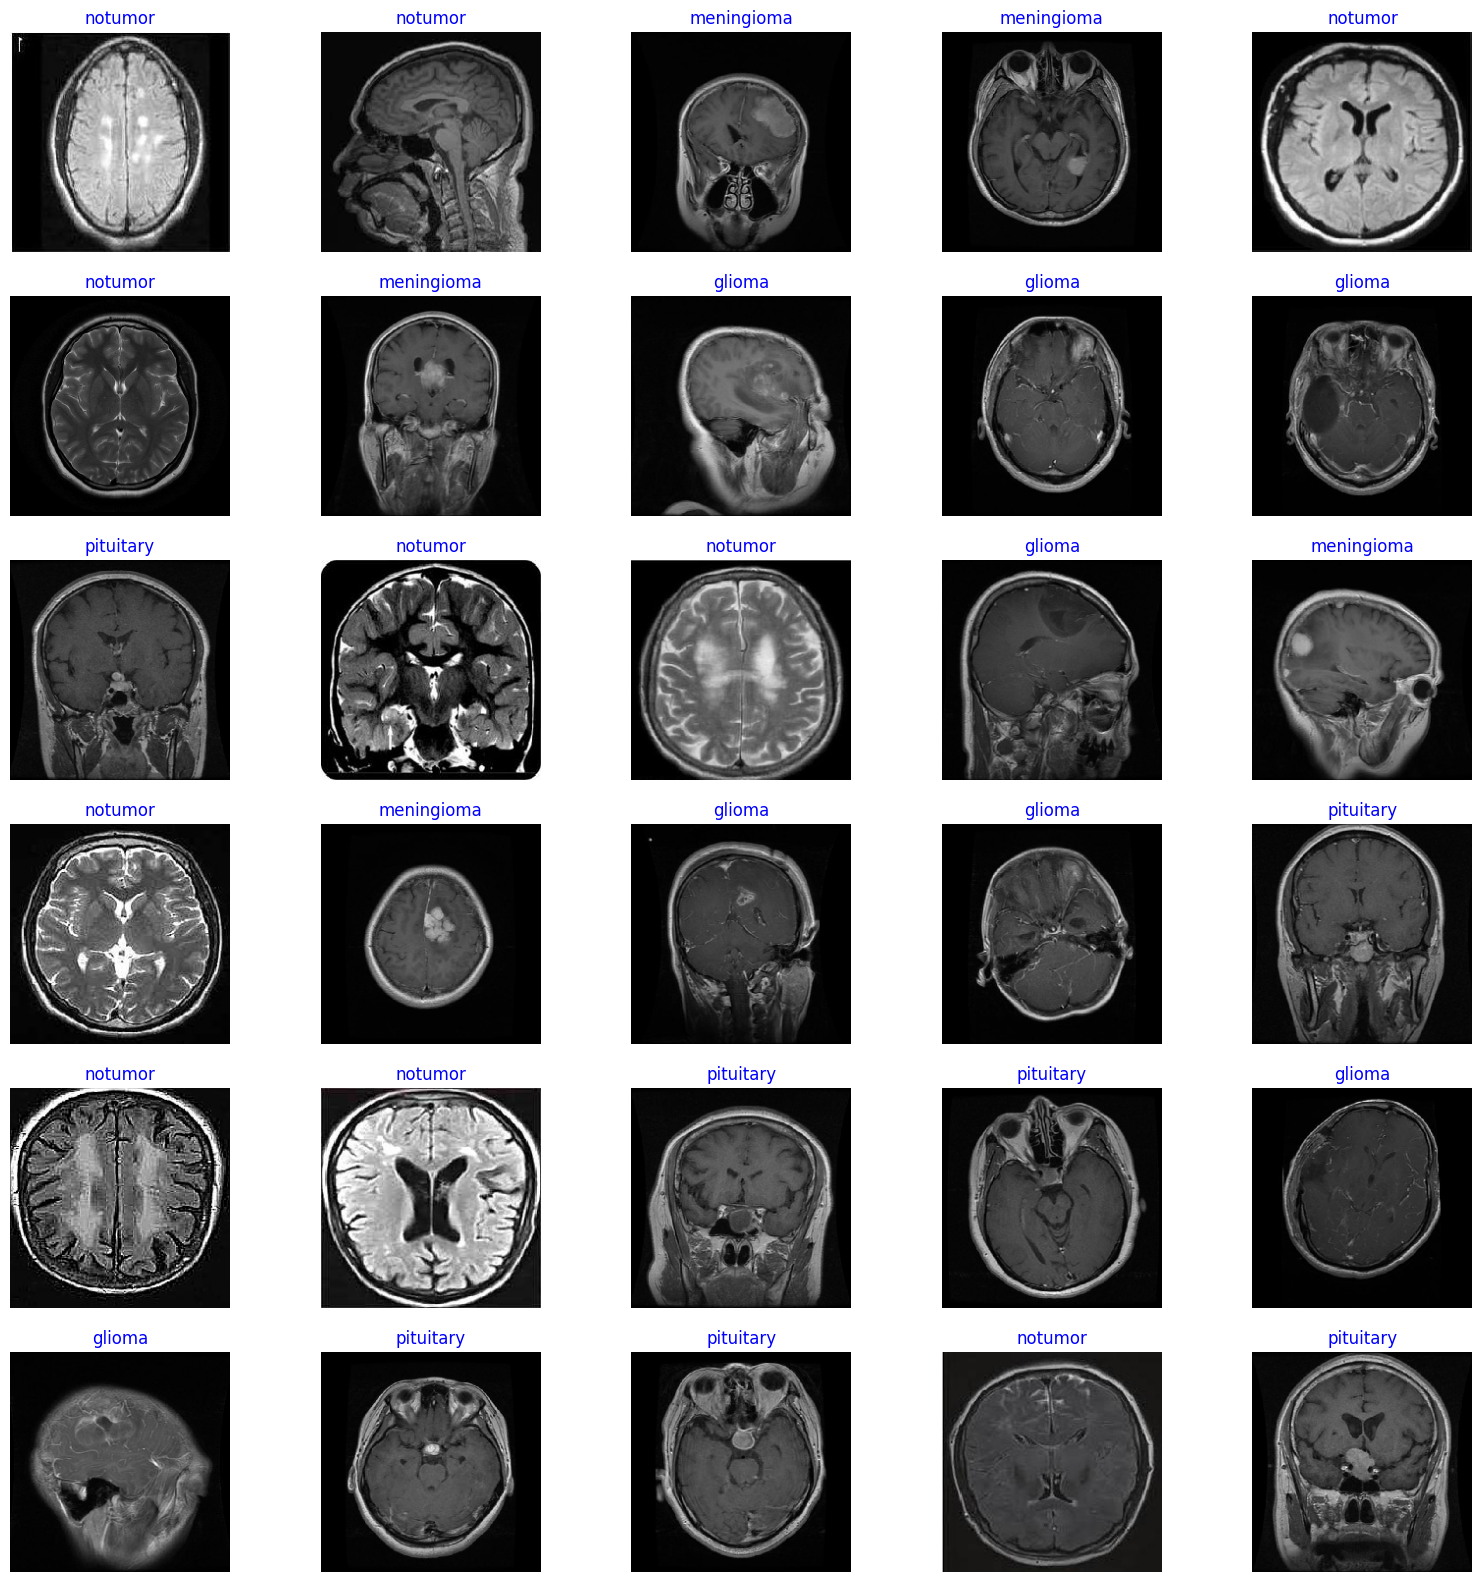

In [4]:
plotter = ImagePlotter(train_generator)
plotter.plot_images()

<br><br><br><br><br><br><br><br><br><br><br>

# Model Training :
<br><br>

In [5]:
model = Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(256, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[metrics.CategoricalAccuracy()])

epochs = 10
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size
)

Epoch 1/10
178/178 [==============================] - 182s 1s/step - loss: 0.7490 - categorical_accuracy: 0.6926 - val_loss: 0.5483 - val_categorical_accuracy: 0.7937
Epoch 2/10
178/178 [==============================] - 182s 1s/step - loss: 0.4288 - categorical_accuracy: 0.8342 - val_loss: 0.3995 - val_categorical_accuracy: 0.8482
Epoch 3/10
178/178 [==============================] - 181s 1s/step - loss: 0.2957 - categorical_accuracy: 0.8887 - val_loss: 0.2971 - val_categorical_accuracy: 0.8866
Epoch 4/10
178/178 [==============================] - 186s 1s/step - loss: 0.1980 - categorical_accuracy: 0.9271 - val_loss: 0.1799 - val_categorical_accuracy: 0.9295
Epoch 5/10
178/178 [==============================] - 184s 1s/step - loss: 0.1554 - categorical_accuracy: 0.9401 - val_loss: 0.1537 - val_categorical_accuracy: 0.9536
Epoch 6/10
178/178 [==============================] - 183s 1s/step - loss: 0.1177 - categorical_accuracy: 0.9586 - val_loss: 0.0675 - val_categorical_accuracy: 0.975

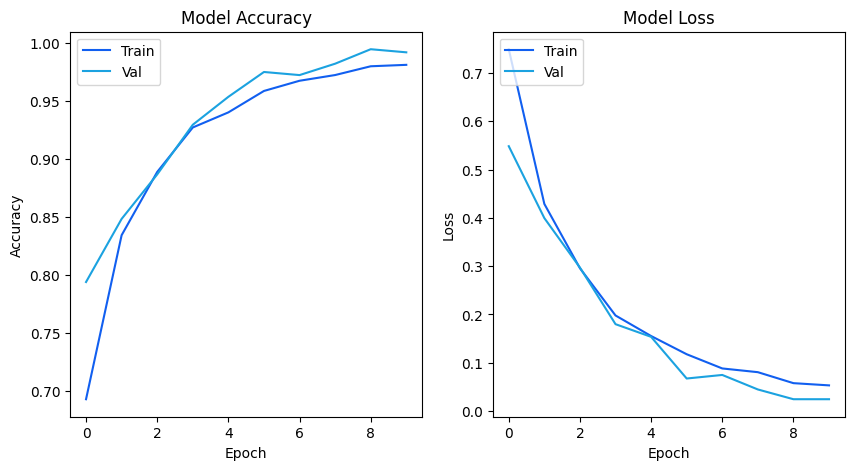

In [6]:
plothist = TrainingHistoryPlotter(history)
plothist.plot()

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 256)       2

In [7]:
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f'Test loss: {test_loss}, Test accuracy: {test_acc}')

40/40 [==============================] - 11s 263ms/step - loss: 0.1557 - categorical_accuracy: 0.9531
Test loss: 0.15573450922966003, Test accuracy: 0.953125


## And this is my custom trained CNN